In [1]:
import pandas as pd
import numpy as np
import json
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn')

# Constants
DATA_DIR = 'Data'
CHUNK_SIZE = 10000  # For processing large files

c:\Users\priya\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\priya\AppData\Local\Temp\ipykernel_26032\2645066766.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [6]:
def load_json_chunk(file_path, chunk_size=CHUNK_SIZE):
    """Load JSON file in chunks to handle large files."""
    data = []
    with open(file_path, 'r') as f:
        try:
            json_data = json.load(f)
            # Extract deposits array
            deposits = json_data.get('deposits', [])
            for deposit in deposits:
                data.append({
                    'wallet_address': deposit['account']['id'],
                    'amount': float(deposit['amount']),
                    'amountUSD': float(deposit['amountUSD']),
                    'asset_symbol': deposit['asset']['symbol'],
                    'asset_id': deposit['asset']['id'],
                    'hash': deposit['hash'],
                    'timestamp': pd.to_datetime(int(deposit['timestamp']), unit='s')
                })
                if len(data) >= chunk_size:
                    yield pd.DataFrame(data)
                    data = []
            if data:
                yield pd.DataFrame(data)
        except json.JSONDecodeError as e:
            print(f"Error reading {file_path}: {e}")

# Load and process all JSON files
all_data = []
DATA_DIR = "C:\\Users\\priya\\Desktop\\PROJECTS\\Zeru Finance\\Compound-V2-wallet\\Data"
json_files = [f for f in os.listdir(DATA_DIR) if f.endswith('.json')]

for json_file in json_files:
    file_path = os.path.join(DATA_DIR, json_file)
    print(f"Processing {json_file}...")
    for chunk in load_json_chunk(file_path):
        all_data.append(chunk)

# Combine all chunks
transactions_df = pd.concat(all_data, ignore_index=True)

# Display basic info
print(f"\nTotal transactions: {len(transactions_df)}")
print(f"Unique wallets: {transactions_df['wallet_address'].nunique()}")
print("\nFirst few transactions:")
transactions_df.head()

Processing compoundV2_transactions_ethereum_chunk_0.json...
Processing compoundV2_transactions_ethereum_chunk_1.json...
Processing compoundV2_transactions_ethereum_chunk_2.json...

Total transactions: 30000
Unique wallets: 8202

First few transactions:


,wallet_address,amount,amountUSD,asset_symbol,asset_id,hash,timestamp
0,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.000000e+16,1.78010,ETH,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0xa1b27194b198762eaa631564fea76008b363c157a1cc...,2019-05-07 01:41:22
1,0xc8355d0e2c265b2fe495ebbc0fc9ad992b40dc8f,8.000000e+16,14.24080,ETH,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x1d2000c49507d94ef42ec995e1ea59b41e61bf0c63d4...,2019-05-07 01:45:11
2,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,4.582921e+21,1562.32014,BAT,0x0d8775f648430679a709e98d2b0cb6250d2887ef,0x4c3b59d70f6205a16f4d6f4c960d22ad332dd740720a...,2019-05-07 02:12:05
3,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,4.013963e+21,4013.96294,DAI,0x89d24a6b4ccb1b6faa2625fe562bdd9a23260359,0xe8b31ff5cf7252a1a496dadfeccef667577d88cdf2c4...,2019-05-07 02:12:05
4,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,9.990000e+18,1775.47275,ETH,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x0eda39d1cb1844e8c2f659219f5a414c0b8261e6dee5...,2019-05-07 02:41:52


Transaction Amount Statistics (USD):
count    3.000000e+04
mean     9.049211e+03
std      7.047671e+04
min      0.000000e+00
25%      2.045599e+01
50%      2.354201e+02
75%      2.000376e+03
max      4.711189e+06
Name: amountUSD, dtype: float64


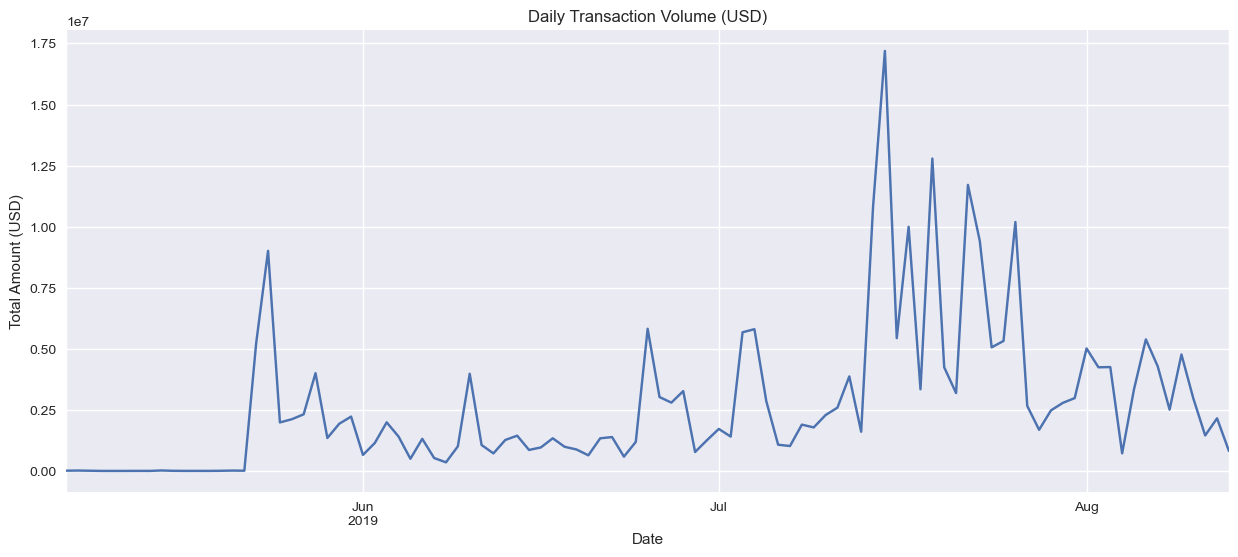

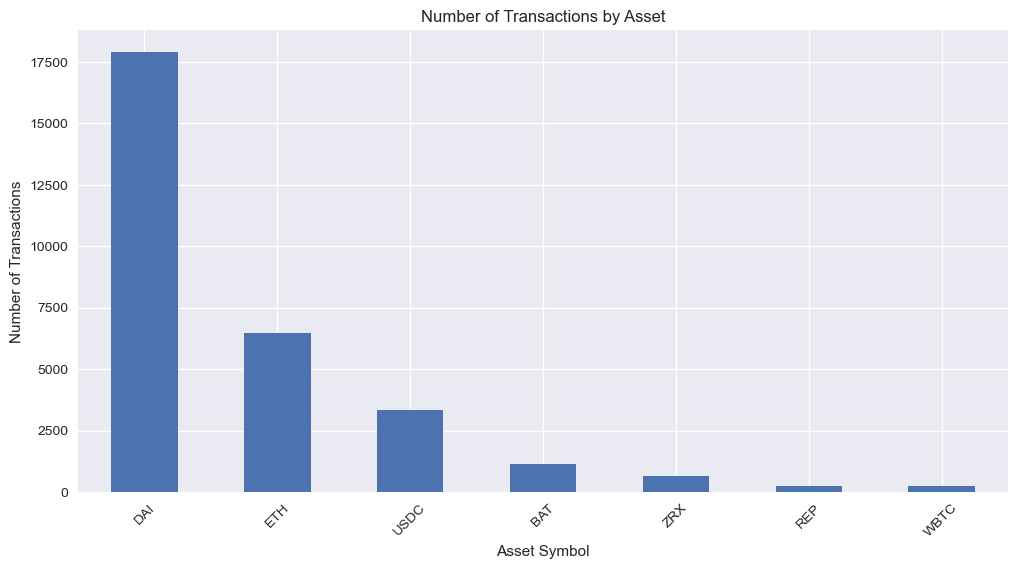

c:\Users\priya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


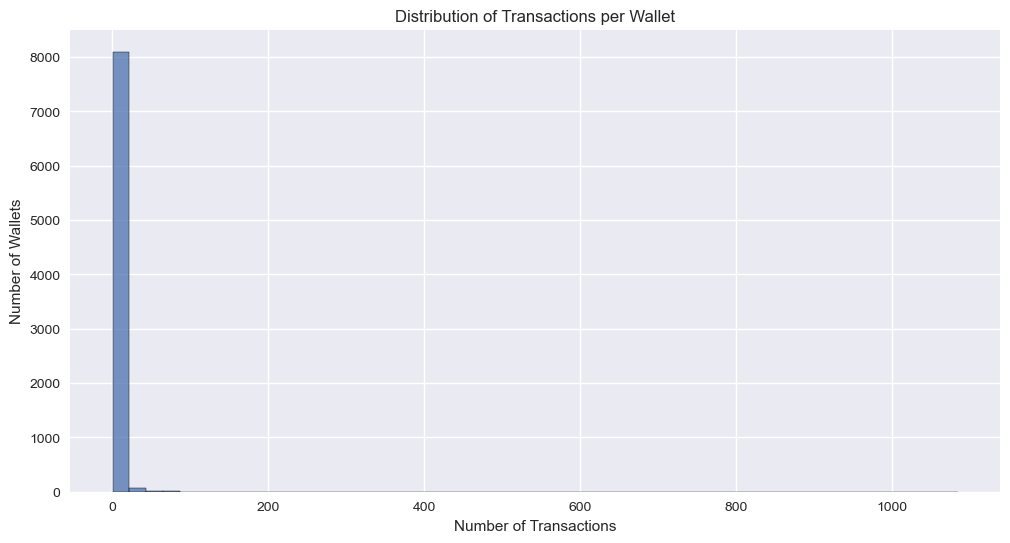


Top 10 Most Active Wallets:
wallet_address
0x37acfef331e6063c8507c2a69c97b4f78c770a5a    1084
0x3eab4037a2e7f4d4d0946c091fe135838221f2b6     354
0xaeebe2d33fbdf50684161d1c1ed29a42ac915841     303
0x07326cbe4792e8e3c1f61c66fefee8253eb2db0c     204
0xbed4e3cd89918563a9ce4b04cf5379daf566bd53     145
0x0e0ec712b3912b5601216455a158cf18152cb62a     140
0xa24f2e6dcbd2da9a220958401dab74b365bd34e1     132
0x6168bb05ccb4aaded0169602bbb6e3cae12902c5     118
0x9d4da31a6f741c53a8f098bce221ecdd4a9cf6be     108
0xbabe31056c0fe1b704d811b2405f6e9f5ae5e59d     107
Name: count, dtype: int64


c:\Users\priya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


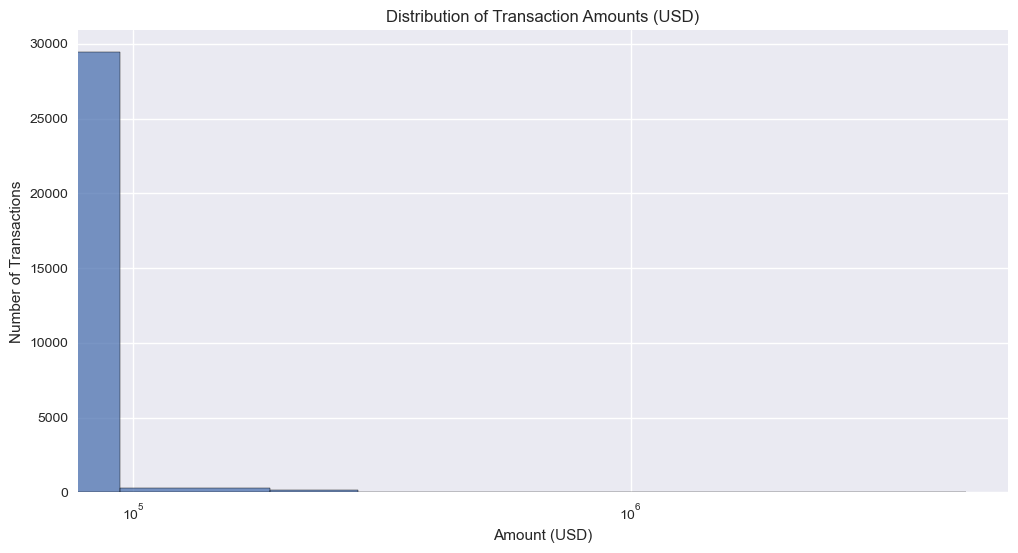

In [7]:
# Basic statistics
print("Transaction Amount Statistics (USD):")
print(transactions_df['amountUSD'].describe())

# Transaction volume over time
plt.figure(figsize=(15, 6))
daily_volume = transactions_df.set_index('timestamp')['amountUSD'].resample('D').sum()
daily_volume.plot()
plt.title('Daily Transaction Volume (USD)')
plt.xlabel('Date')
plt.ylabel('Total Amount (USD)')
plt.grid(True)
plt.show()

# Asset distribution
plt.figure(figsize=(12, 6))
asset_counts = transactions_df['asset_symbol'].value_counts()
asset_counts.plot(kind='bar')
plt.title('Number of Transactions by Asset')
plt.xlabel('Asset Symbol')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

# Wallet activity distribution
plt.figure(figsize=(12, 6))
wallet_activity = transactions_df['wallet_address'].value_counts()
sns.histplot(wallet_activity, bins=50)
plt.title('Distribution of Transactions per Wallet')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Wallets')
plt.show()

# Top 10 most active wallets
print("\nTop 10 Most Active Wallets:")
top_wallets = wallet_activity.head(10)
print(top_wallets)

# Transaction amount distribution
plt.figure(figsize=(12, 6))
sns.histplot(transactions_df['amountUSD'], bins=50)
plt.title('Distribution of Transaction Amounts (USD)')
plt.xlabel('Amount (USD)')
plt.ylabel('Number of Transactions')
plt.xscale('log')  # Using log scale due to wide range of values
plt.show()

In [8]:
# Feature engineering at the wallet level
wallet_group = transactions_df.groupby('wallet_address')

wallet_features = pd.DataFrame({
    'total_transactions': wallet_group.size(),
    'total_amount_usd': wallet_group['amountUSD'].sum(),
    'avg_amount_usd': wallet_group['amountUSD'].mean(),
    'std_amount_usd': wallet_group['amountUSD'].std().fillna(0),
    'wallet_age_days': (wallet_group['timestamp'].max() - wallet_group['timestamp'].min()).dt.days + 1,
    'first_txn': wallet_group['timestamp'].min(),
    'last_txn': wallet_group['timestamp'].max(),
    'asset_diversity': wallet_group['asset_symbol'].nunique(),
})

# Transaction frequency (per day)
wallet_features['txn_per_day'] = wallet_features['total_transactions'] / wallet_features['wallet_age_days']

# Reset index to have wallet_address as a column
wallet_features = wallet_features.reset_index()

# Show feature statistics
print(wallet_features.describe())
wallet_features.head()

       total_transactions  total_amount_usd  avg_amount_usd  std_amount_usd  \
count         8202.000000      8.202000e+03    8.202000e+03    8.202000e+03   
mean             3.657644      3.309880e+04    5.612916e+03    2.846052e+03   
min              1.000000      0.000000e+00    0.000000e+00    0.000000e+00   
25%              1.000000      2.006928e+01    1.495414e+01    0.000000e+00   
50%              2.000000      2.149940e+02    1.063513e+02    2.754705e+00   
75%              3.000000      2.742523e+03    1.000395e+03    2.634925e+02   
max           1084.000000      3.968348e+07    4.711189e+06    1.334265e+06   
std             14.597125      5.604948e+05    6.679775e+04    2.987486e+04   

       wallet_age_days                      first_txn  \
count      8202.000000                           8202   
mean         10.097781  2019-07-10 05:58:17.292002048   
min           1.000000            2019-05-07 01:41:22   
25%           1.000000  2019-06-16 14:17:01.249999872   
50%

,wallet_address,total_transactions,total_amount_usd,avg_amount_usd,std_amount_usd,wallet_age_days,first_txn,last_txn,asset_diversity,txn_per_day
0,0x000000aaee6a496aaf7b7452518781786313400f,76,770814.615710,10142.297575,5740.490392,30,2019-07-02 10:53:55,2019-07-31 18:20:12,3,2.533333
1,0x00000a6bbb35ea3f6f8dbc94801738f490c30a8d,2,6.063779,3.031889,2.865407,3,2019-06-03 23:56:55,2019-06-06 20:25:14,1,0.666667
2,0x0006e4548aed4502ec8c844567840ce6ef1013f5,25,236378.577102,9455.143084,8744.263019,73,2019-05-15 11:32:11,2019-07-26 16:45:57,4,0.342466
3,0x0007808d13026d3245351759abc4f90a7bdd50de,2,14.972313,7.486156,3.529008,1,2019-08-02 05:16:52,2019-08-02 05:54:27,1,2.000000
4,0x000be263b3ceb55d22ed9b40d7619f62c4862c80,19,84697.515172,4457.763956,2520.430642,72,2019-05-27 02:41:05,2019-08-06 15:52:06,3,0.263889


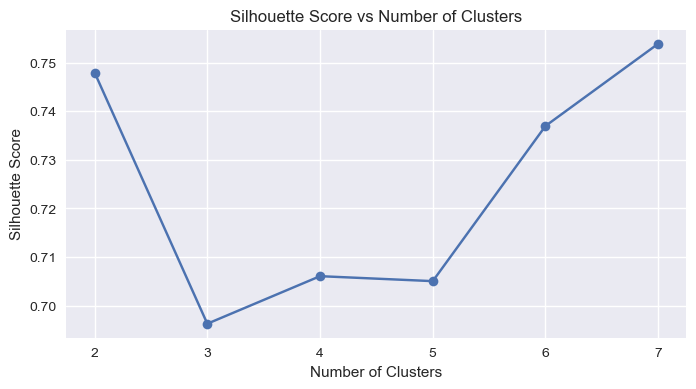

Optimal number of clusters: 7


In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Select features for clustering (exclude wallet_address, first_txn, last_txn)
feature_cols = [
    'total_transactions', 'total_amount_usd', 'avg_amount_usd',
    'std_amount_usd', 'wallet_age_days', 'asset_diversity', 'txn_per_day'
]

# Scale features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(wallet_features[feature_cols])

# Reduce dimensionality for clustering
pca = PCA(n_components=0.95, random_state=42)  # Keep 95% of variance
pca_features = pca.fit_transform(scaled_features)

# Find optimal number of clusters using silhouette score
silhouette_scores = []
n_clusters_range = range(2, 8)
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_features)
    silhouette_scores.append(silhouette_score(pca_features, cluster_labels))

# Plot silhouette scores
plt.figure(figsize=(8, 4))
plt.plot(list(n_clusters_range), silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Choose the best number of clusters
optimal_n_clusters = n_clusters_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_n_clusters}")

# Fit KMeans with optimal clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
wallet_features['cluster'] = kmeans.fit_predict(pca_features)

In [10]:

cluster_means = wallet_features.groupby('cluster')[feature_cols].mean()

cluster_means['composite'] = (
    cluster_means['total_transactions'] +
    cluster_means['total_amount_usd'] +
    cluster_means['wallet_age_days'] +
    cluster_means['asset_diversity'] +
    cluster_means['txn_per_day']
)
cluster_order = cluster_means['composite'].sort_values(ascending=False).index.tolist()


score_bands = np.linspace(100, 0, num=len(cluster_order))
cluster_to_score = {cluster: score_bands[i] for i, cluster in enumerate(cluster_order)}


wallet_features['base_score'] = wallet_features['cluster'].map(cluster_to_score)


feature_adj = MinMaxScaler().fit_transform(wallet_features[feature_cols]).mean(axis=1)
wallet_features['credit_score'] = wallet_features['base_score'] + feature_adj * (100 / len(cluster_order) / 2)
wallet_features['credit_score'] = wallet_features['credit_score'].clip(0, 100)


print("Top 5 scoring wallets:")
display(wallet_features.nlargest(5, 'credit_score')[['wallet_address', 'credit_score']])
print("\nBottom 5 scoring wallets:")
display(wallet_features.nsmallest(5, 'credit_score')[['wallet_address', 'credit_score']])


Top 5 scoring wallets:


,wallet_address,credit_score
0,0x000000aaee6a496aaf7b7452518781786313400f,100.0
6,0x00120ec799017bbab1049174ac3cd706260effc4,100.0
23,0x0073c423a0b5d88b330d481301025db1ab65d891,100.0
31,0x009c07cc41a358176c97b525284d50f4960bc939,100.0
32,0x00a050ae48f4f5463321a9eb2aa2dc2314076ca8,100.0



Bottom 5 scoring wallets:


,wallet_address,credit_score
188,0x05693a71eb336e51c9d43eca6696b5c0553591e0,0.032139
4963,0x9bb157357895f07e59c239f4c8e9729d83249854,0.032139
7065,0xdbb6acbbdc55ad42c6a0d7e4a90ea47059437e9a,0.032139
7962,0xf88078acd8dd15a6acca291a8157163af586324c,0.032139
7304,0xe3cb4799dea19fafc0272a61b0aa89603554de28,0.032139


In [11]:
# Calculate cluster-level means for key features
cluster_stats = wallet_features.groupby('cluster')[['total_transactions', 'wallet_age_days', 'asset_diversity']].mean()

# Define thresholds (median of all wallets)
txn_median = wallet_features['total_transactions'].median()
age_median = wallet_features['wallet_age_days'].median()
diversity_median = wallet_features['asset_diversity'].median()

# Classify clusters as "Good" or "Bad"
def classify_cluster(row):
    if (row['total_transactions'] >= txn_median and
        row['wallet_age_days'] >= age_median and
        row['asset_diversity'] >= diversity_median):
        return "Good"
    else:
        return "Bad"

cluster_stats['behavior_label'] = cluster_stats.apply(classify_cluster, axis=1)

# Map this label back to each wallet
cluster_to_label = cluster_stats['behavior_label'].to_dict()
wallet_features['behavior_label'] = wallet_features['cluster'].map(cluster_to_label)

# Now when you export:
wallet_features.to_csv('wallet_features.csv', index=False)

c:\Users\priya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


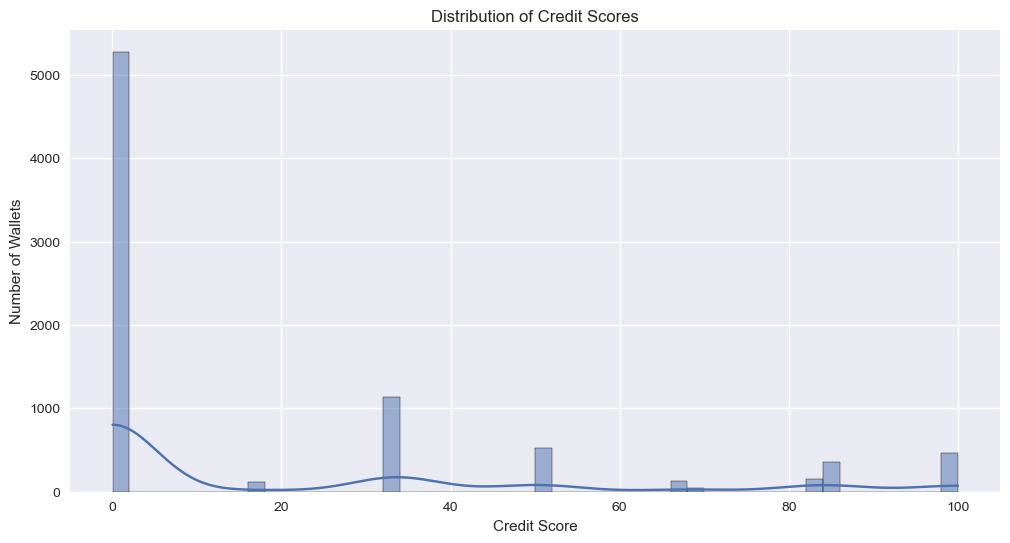

In [12]:
# Visualize the distribution of credit scores
plt.figure(figsize=(12, 6))
sns.histplot(wallet_features['credit_score'], bins=50, kde=True)
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Number of Wallets')
plt.show()

In [13]:
top_1000 = wallet_features.sort_values('credit_score', ascending=False).head(1000)
top_1000[['wallet_address', 'credit_score', 'behavior_label']].to_csv('wallet_scores.csv', index=False)
print("Top 1,000 wallet scores wallet_scores.csv")

Top 1,000 wallet scores wallet_scores.csv


In [ ]:
# import joblib

# # Save the scaler, PCA, KMeans, and feature columns
# joblib.dump(scaler, 'scaler.joblib')
# joblib.dump(pca, 'pca.joblib')
# joblib.dump(kmeans, 'kmeans.joblib')
# joblib.dump(feature_cols, 'feature_cols.joblib')
# joblib.dump(cluster_to_score, 'cluster_to_score.joblib')